### HW 3 Practice

#### 1. Visualize the road network in the data Tuscaloosa

In [2]:
# load the data and libraries

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# # first install py7zr
# # conda install -c conda-forge py7zr

# # use py7zr to extract the shapefile
# import py7zr
# with py7zr.SevenZipFile('data/Tuscaloosa_road.7z', mode='r') as z:
#     z.extractall(path='data/Tuscaloosa_road/')

# import zipfile
# with zipfile.ZipFile('data/cb_2018_us_zcta510_500k.zip', mode='r') as z:
#     z.extractall(path='data/zcta/')

In [5]:
road_df=gpd.read_file('data/Tuscaloosa_road/Tuscaloosa_County_Roads.shp') #read the road network shapefile

zip_df=gpd.read_file('data/zcta/cb_2018_us_zcta510_500k.shp') #read the zcta shapefile

# zip code of interest (in this case, Tuscaloosa city)
zip_range=[35405,35401,35404,35473,35406,35475,35453,35476,35474,35466,35546,35490,35456,\
35444,35452,35579,35188,35446,35463,35407,35480,35403,35402,35458,35469,35478,35449,35482,35457,35440,35486,35468,\
35485,35487]

In [6]:
#take a look at road shapefile
print(zip_df.columns)
road_df.head()

Index(['ZCTA5CE10', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10',
       'geometry'],
      dtype='object')


,FID,LINEARID,FULLNAME,RTTYP,MTFCC,Shape__Len,geometry
0,1,11084709433,None,None,S1400,102.948478,"LINESTRING (-87.53009 33.13045, -87.52974 33.1..."
1,2,11084692652,White Oaks Ln,M,S1400,437.059199,"LINESTRING (-87.32591 33.24605, -87.32448 33.2..."
2,3,11084670850,Co Rd 88,C,S1400,4680.430756,"LINESTRING (-87.56716 33.21325, -87.56704 33.2..."
3,4,11084709723,None,None,S1400,263.507162,"LINESTRING (-87.41462 33.27598, -87.41469 33.2..."
4,5,11084708965,None,None,S1400,364.999546,"LINESTRING (-87.52662 33.13047, -87.52652 33.1..."


<AxesSubplot:>

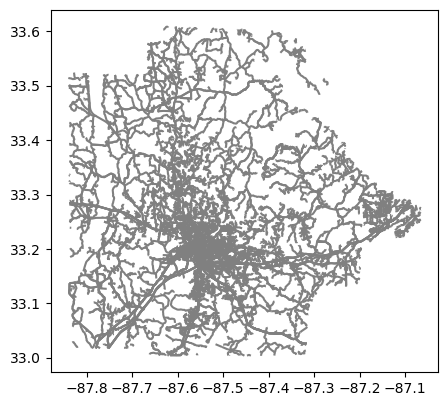

In [7]:
road_df.plot(figsize=(5,5),color='grey')

In [8]:
#take a look at zip code areas
zip_df.head() 
## cover all US zip codes, we need to filter out the zip codes of interest

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [9]:
zip_df['GEOID10']=zip_df['GEOID10'].astype(int)

#find the set of index that are in the zip range
idx=zip_df['GEOID10'].isin(zip_range).astype(bool)
#create the new dataframe
newzip_df=zip_df[idx]

<AxesSubplot:>

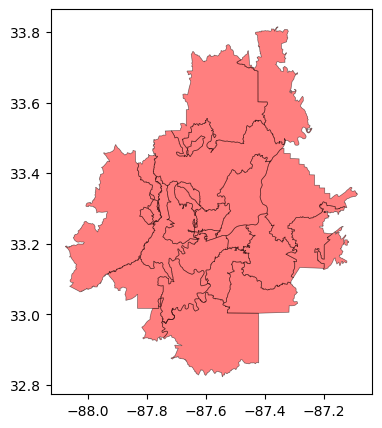

In [10]:
newzip_df.plot(figsize=(5,5),color="r",alpha=0.5,edgecolor='k',linewidth=0.5)

<AxesSubplot:>

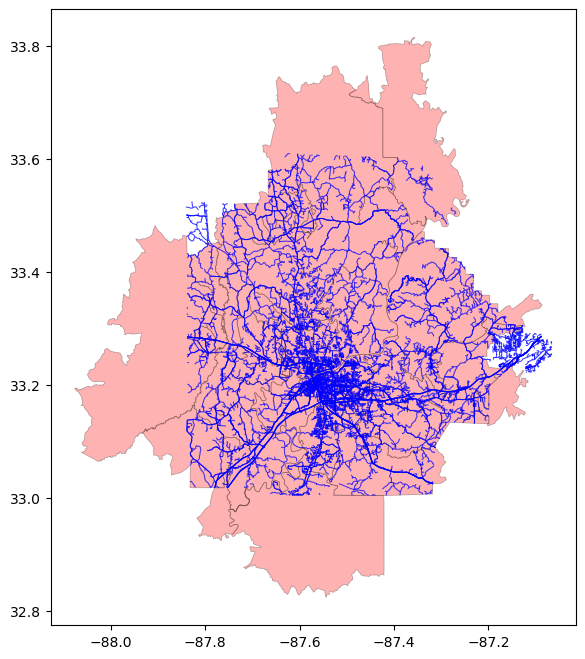

In [11]:
#plot
fig,ax=plt.subplots(1,1,figsize=(8,8))
newzip_df.plot(ax=ax,facecolor='r',alpha=0.3, edgecolor='k', linewidth=0.5)
road_df.plot(ax=ax,edgecolor='b', alpha=0.75, linewidth=0.75)

In [12]:
# get the intersection of the road network and the zip code areas
newzip_df=newzip_df.to_crs('EPSG:4326')
county_road=gpd.overlay(road_df,newzip_df,how='intersection')

Text(0.5, 1.0, 'Tuscaloosa County Zip code and Road network')

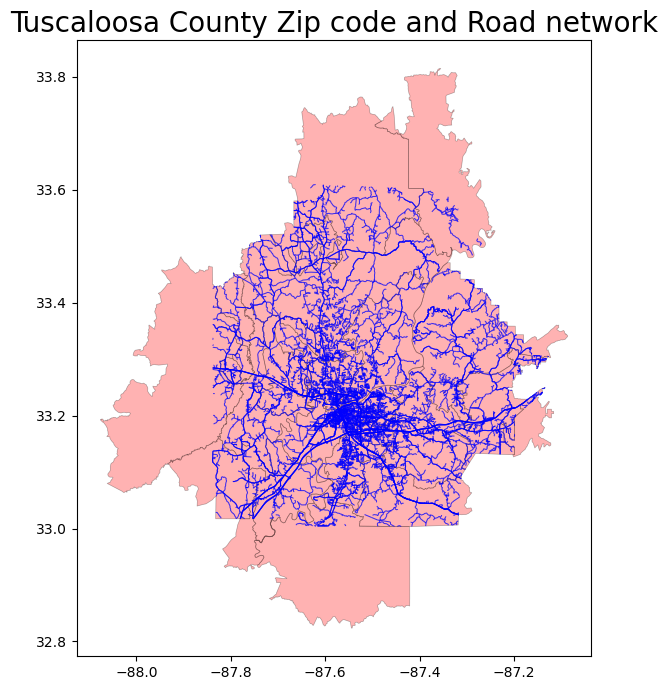

In [13]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
newzip_df.plot(ax=ax,facecolor='r',edgecolor='k',alpha=0.3, linewidth=0.5)
county_road.plot(ax=ax,edgecolor='b', alpha=0.75, linewidth=0.75)
ax.set_title('Tuscaloosa County Zip code and Road network',fontsize=20)

### 2. visualize the road network with random speed information

#### options for colormap: 
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [14]:
nsample=county_road.shape[0] #this returns the number of links.
speed=30+40*np.random.random(nsample)   #remember, random.random return random variabies in the range [0,1]

# or generate random speed as integers between 30 and 70
# speed=np.random.randint(30,70,nsample)
county_road['speed']=speed

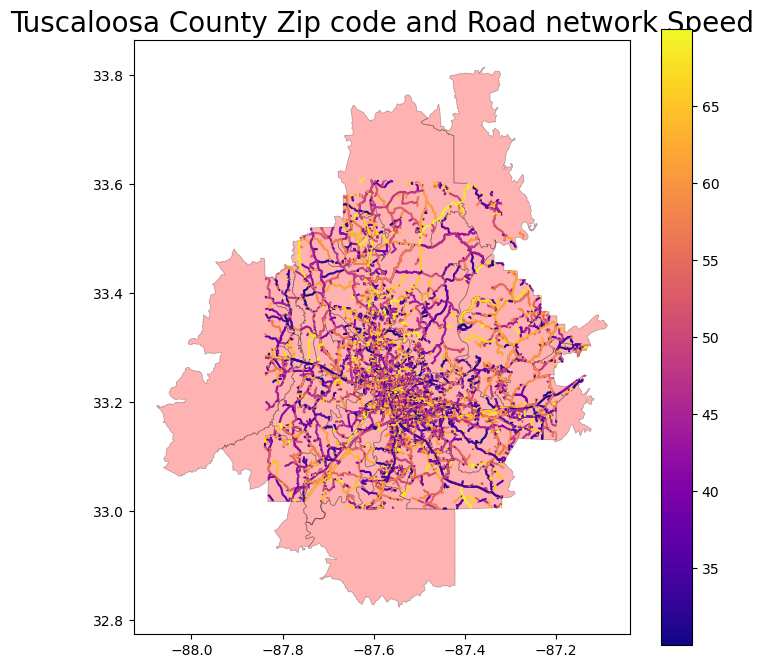

In [15]:
#Lets visualize again, but this time gives attribute to road network 
fig,ax=plt.subplots(1,1,figsize=(8,8))
newzip_df.plot(ax=ax,facecolor='r',edgecolor='k',alpha=0.3, linewidth=0.5)
county_road.plot('speed',ax=ax,cmap='plasma',legend=True)
ax.set_title('Tuscaloosa County Zip code and Road network Speed',fontsize=20)

#let's save it
fig.savefig('results/County_speed.pdf')

### 3. Understanding the road length distribution using violin plot

In [16]:
# select the zip codes of interest:
selected_zip_codes = [35188,35401,35404,35405,35406,35407,35444,35446,35453,35456,35458,35463]

In [17]:
# need to convert the EPSG:4326 to EPSG:3857
print(county_road.iloc[0].geometry)

LINESTRING (-87.5300900645519 33.1304491846617, -87.529738064452 33.1304281846707, -87.5291670642903 33.1304011846868)


In [18]:
#project to 3857 for **meters** calculation

m_county_road=county_road.to_crs('EPSG:3857')

print(m_county_road.iloc[0].geometry)
print(m_county_road.geometry.length)

LINESTRING (-9743805.055075292 3912631.7389714066, -9743765.870603412 3912628.947439516, -9743702.30715617 3912625.358328667)
0         102.948478
1         364.999546
2        4176.160895
3         262.450126
4        1580.499904
            ...     
11983     521.490823
11984     209.856401
11985    1333.389023
11986     451.469978
11987     595.199646
Length: 11988, dtype: float64


In [19]:
### In case the meter measurement is not working, make sure the version library aligns with the my environment:

# The pandas version is 1.3.3.
# The geopandas version is 0.9.0.
# The seaborn version is 0.11.2.

# check the version of the libraries
print('The pandas version is {}.'.format(pd.__version__))
print('The geopandas version is {}.'.format(gpd.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The pandas version is 1.3.3.
The geopandas version is 0.9.0.
The seaborn version is 0.11.2.


In [24]:
selected_m_county_road = m_county_road[m_county_road['GEOID10'].isin(selected_zip_codes)]

selected_m_county_road.head(5)

,FID,LINEARID,FULLNAME,RTTYP,MTFCC,Shape__Len,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,speed
0,1,11084709433,None,None,S1400,102.948478,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-9743805.055 3912631.739, -9743765...",36.414951
1,5,11084708965,None,None,S1400,364.999546,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-9743418.442 3912634.531, -9743407...",49.035975
2,9,1105598219908,Jug Factory Rd,M,S1400,4532.600187,35405,8600000US35405,35405,123140780,2140953,"MULTILINESTRING ((-9743305.899 3917134.555, -9...",62.911863
3,11,11084689828,Fieldwood Dr,M,S1400,262.450126,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-9742731.601 3914894.962, -9742728...",31.764140
4,12,11084690141,Inverness Pkwy,M,S1400,1580.499904,35405,8600000US35405,35405,123140780,2140953,"LINESTRING (-9746865.674 3912354.716, -9746856...",58.693047


In [26]:
selected_m_county_road["length"] = selected_m_county_road.geometry.length

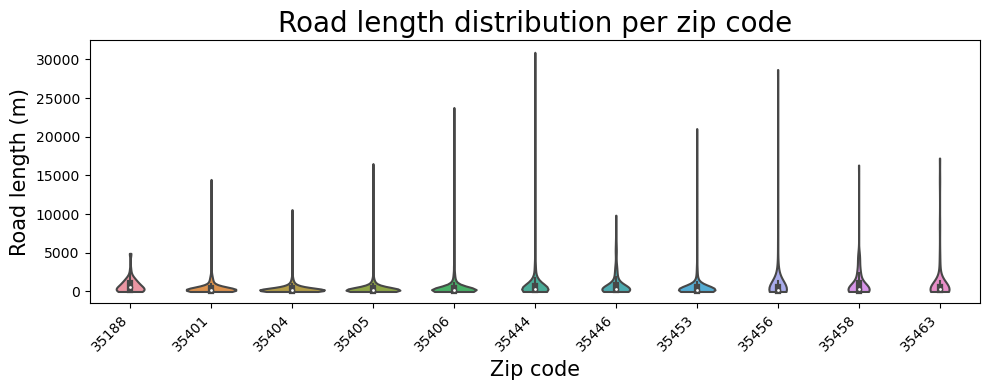

In [31]:
### plot it!
# violin plot of speed per zip code

fig,ax=plt.subplots(1,1,figsize=(10,4))
sns.violinplot(x="GEOID10", y="length", data=selected_m_county_road,ax=ax, cut=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

ax.set_title('Road length distribution per zip code',fontsize=20)
ax.set_xlabel('Zip code',fontsize=15)
ax.set_ylabel('Road length (m)',fontsize=15)

plt.tight_layout()
fig.savefig('results/County_length_violin.pdf')

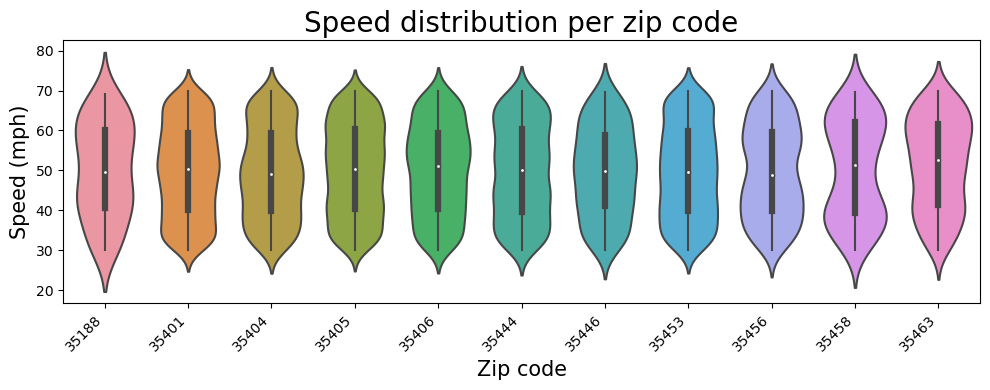

In [29]:
# plot average speed

fig,ax=plt.subplots(1,1,figsize=(10,4))
sns.violinplot(x="GEOID10", y="speed", data=selected_m_county_road,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

ax.set_title('Speed distribution per zip code',fontsize=20)
ax.set_xlabel('Zip code',fontsize=15)
ax.set_ylabel('Speed (mph)',fontsize=15)

plt.tight_layout()
fig.savefig('results/County_speed_violin.pdf')

In [47]:
#### Other useful functions

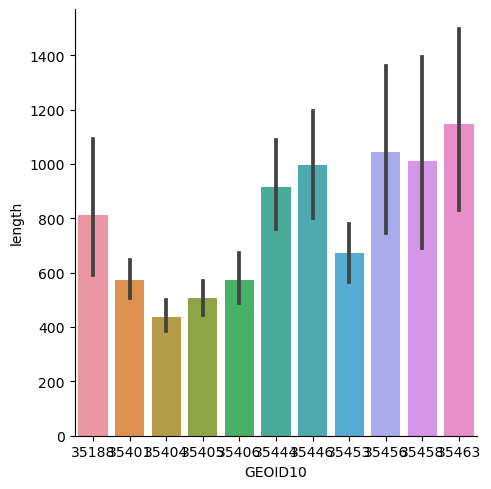

In [43]:
sns.catplot(x="GEOID10", y="length", data=selected_m_county_road, kind="bar")

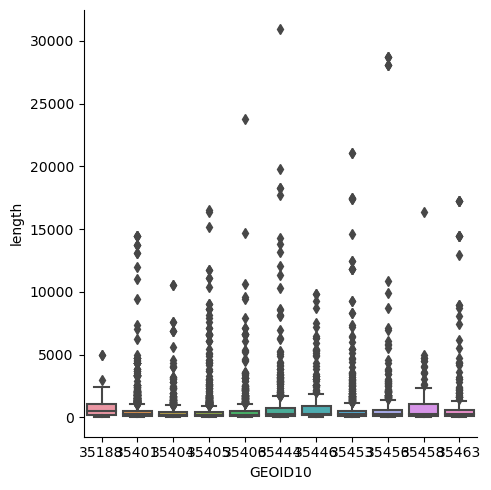

In [44]:
sns.catplot(x="GEOID10", y="length", data=selected_m_county_road, kind="box")

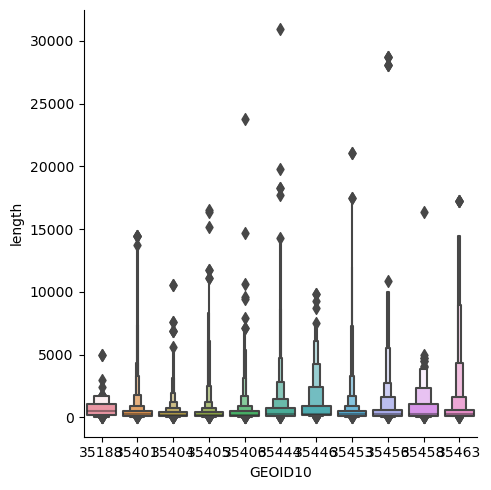

In [45]:
sns.catplot(x="GEOID10", y="length", data=selected_m_county_road, kind="boxen")


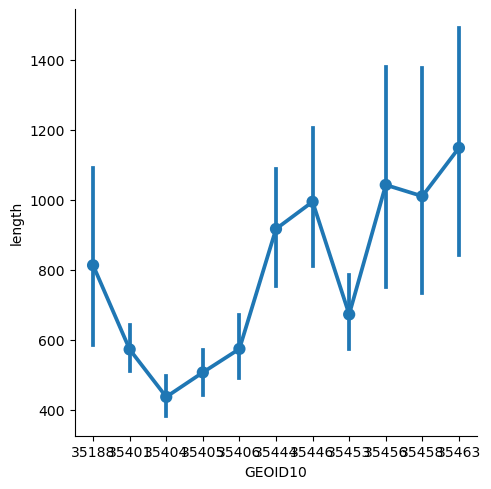

In [46]:
sns.catplot(x="GEOID10", y="length", data=selected_m_county_road, kind="point")


### What's more:
- NYC taxi trip data

In [50]:
#read the csv file --- extremely common use
df=pd.read_csv('data/example_taxi_trip.csv')

In [51]:
#check the first few lines...
df.head(2) #first 2 lines

,hack_license,pickup_datetime,start_lat,start_lng,dropoff_datetime,end_lat,end_lng,distance_miles,duration_secs,passenger_count
0,58894369838B3783D30EEAA92B364BEB,2013-08-11 10:16:00,40.761032,-73.987091,2013-08-11 10:19:00,40.758083,-73.985519,0.34,180,1
1,6AC79A2B688191545021B8CF96ED385F,2013-08-11 10:00:00,40.773907,-73.873360,2013-08-11 10:15:00,40.648796,-73.782616,12.11,900,1


In [52]:
#check the last few lines...
df.tail(3) #last 3 lines

,hack_license,pickup_datetime,start_lat,start_lng,dropoff_datetime,end_lat,end_lng,distance_miles,duration_secs,passenger_count
90956,2C249968D2CD72243CC987C110A73BF1,2013-08-11 20:20:00,40.76984,-73.954788,2013-08-11 20:24:00,40.776981,-73.963409,0.82,240,6
90957,7351E9BA21A39E025AE412FE5E2B4879,2013-08-11 20:12:00,40.74168,-73.989563,2013-08-11 20:23:00,40.721451,-73.992188,1.77,660,6
90958,B240D08915F9F593F219D9109127FF1A,2013-08-11 19:52:00,40.75827,-73.992775,2013-08-11 20:09:00,40.736713,-73.981636,2.22,1020,4


In [53]:
#get summary statistics of your data.. Only works for numerical values
df[["distance_miles","duration_secs","passenger_count"]].describe()

,distance_miles,duration_secs,passenger_count
count,90959.000000,90959.000000,90959.000000
mean,3.315111,783.975967,2.166416
std,3.893153,608.635183,1.747659
min,0.000000,-10.000000,1.000000
25%,1.150000,360.000000,1.000000
50%,1.950000,600.000000,1.000000
75%,3.570000,1020.000000,3.000000
max,47.600000,7200.000000,6.000000


In [54]:
#select a column of values:
mydist=df['distance_miles']
print('Total distance:', sum(mydist))

Total distance: 301539.17999999505


In [55]:
# get the average milleage, duration, and passenger count per taxi.
df2=df.groupby(['hack_license'])[["distance_miles","duration_secs","passenger_count"]].mean()
df2.head()

,distance_miles,duration_secs,passenger_count
hack_license,,,
000CCA239BFDC0ABE2895AC9086C4290,4.460,780.0,6.0
001C8AAB90AEE49F36FCAA7B4136C81A,4.595,1065.0,1.0
0025133AD810DBE80D35FCA8BF0BCA1F,3.670,1140.0,1.0
002C093A2CB9FD40C8C54AB5D158FC47,8.452,1740.0,1.0
003238F3E0623D554E28DB105C6B9A78,6.076,1128.0,1.0


### Trajectory visualization

In [20]:
trajectory_gdf=gpd.read_file("data/trajectory/infected_matching_153.geojson")

In [26]:
print(trajectory_gdf["geometry"][0])

LINESTRING Z (-74.000927 40.680981 0, -74.001018 40.680792 0, -74.001122 40.680569 0, -74.00134 40.680121 0, -74.001516 40.679753 0, -74.001905 40.678935 0, -74.001952 40.678837 0, -74.00204 40.678641 0, -74.002107 40.678515 0, -74.002146 40.678457 0, -74.002184 40.678436 0, -74.002232 40.67843 0, -74.002388 40.678431 0, -74.002388 40.678431 0, -74.002723 40.678849 0, -74.002723 40.678849 0, -74.002765 40.679001 0, -74.002771 40.67902 0, -74.002792 40.679114 0, -74.002787 40.679131 0, -74.002772 40.679211 0, -74.002696 40.679329 0, -74.002492 40.679582 0, -74.00232 40.679809 0, -74.00219 40.680106 0, -74.002144 40.680259 0, -74.002137 40.680348 0, -74.002142 40.680437 0, -74.002173 40.680553 0, -74.002236 40.68068 0, -74.002468 40.68108 0, -74.002512 40.681165 0, -74.002543 40.681254 0, -74.002552 40.681376 0, -74.002562 40.681513 0, -74.002562 40.681513 0, -74.002406 40.681836 0, -74.001017 40.684727 0, -73.999747 40.687349 0, -73.998802 40.689321 0, -73.998714 40.689557 0, -73.998654